In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [2]:
train_df = pd.read_csv('Data/data_train_mnist.csv')
test_df = pd.read_csv('Data/data_test_mnist.csv')


In [22]:
train_df.head()

,label,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,...,pixel 774,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783
0,0.0,15.0,14.0,10.0,30.0,62.0,88.0,109.0,129.0,114.0,...,176.0,179.0,164.0,177.0,184.0,141.0,50.0,8.0,11.0,12.0
1,1.0,121.0,140.0,151.0,170.0,171.0,194.0,196.0,188.0,172.0,...,175.0,175.0,172.0,171.0,157.0,144.0,130.0,98.0,73.0,15.0
2,1.0,23.0,200.0,21.0,22.0,25.0,26.0,25.0,22.0,6.0,...,126.0,114.0,100.0,99.0,101.0,69.0,110.0,33.0,28.0,30.0
3,1.0,101.0,82.0,90.0,100.0,137.0,145.0,178.0,125.0,141.0,...,159.0,128.0,127.0,110.0,119.0,135.0,143.0,159.0,120.0,85.0
4,0.0,70.0,90.0,167.0,179.0,95.0,82.0,33.0,0.0,0.0,...,214.0,211.0,198.0,210.0,203.0,191.0,166.0,56.0,0.0,0.0


In [4]:
train_df = np.array(train_df,dtype='float32')
test_df = np.array(test_df,dtype='float32')
x_train =  train_df[:,1:] /255
y_train =  train_df[:,0]

x_test =  test_df[:,1:] /255
y_test =  test_df[:,0]

In [23]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state=12345)

In [24]:
image_sample = x_train[300].reshape(28,28) #reshape into current dimension


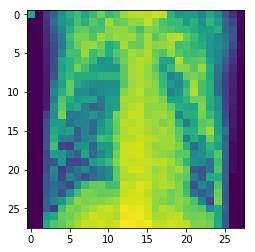

In [25]:
plt.imshow(image_sample)
plt.show()

# Create CNN Model

In [26]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape:{}'.format(x_train.shape))
print('x_test shape:{}'.format(x_test.shape))
print('x_validate shape:{}'.format(x_validate.shape))


x_train shape:(3337, 28, 28, 1)
x_test shape:(624, 28, 28, 1)
x_validate shape:(835, 28, 28, 1)


In [27]:
name = '1_Layer'
cnn_model_1 = Sequential([
    Conv2D(filters=64, kernel_size=3, activation='relu', input_shape = im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout'),
    
    Flatten(name='Flatten'),
    Dense(32, activation='relu', name='Dense'),
    Dense(2, activation='softmax', name='Output')
    
],name=name)

name = '2_Layer'
cnn_model_2 = Sequential([
    Conv2D(filters=64, kernel_size=3, activation='relu', input_shape = im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout_1'),
    Conv2D(filters=64, kernel_size=3, activation='relu', input_shape = im_shape, name='Conv2D-2'),
    Dropout(0.25, name='Dropout_2'),
    Flatten(name='Flatten'),
    Dense(64, activation='relu', name='Dense'),
    Dense(2, activation='softmax', name='Output')
    
],name=name)

name = '3_Layer'
cnn_model_3 = Sequential([
    Conv2D(filters=64, kernel_size=3, activation='relu', kernel_initializer='he_normal', input_shape = im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout_1'),
    Conv2D(filters=64, kernel_size=3, activation='relu', input_shape = im_shape, name='Conv2D-2'),
    Dropout(0.25, name='Dropout_2'),
    Conv2D(filters=128, kernel_size=3, activation='relu', input_shape = im_shape, name='Conv2D-3'),
    Dropout(0.4, name='Dropout_3'),
    Flatten(name='Flatten'),
    Dense(128, activation='relu', name='Dense'),
    Dropout(0.4, name='Dropout_4'),
    Dense(2, activation='softmax', name='Output') 
],name=name)

cnn_models = [cnn_model_1, cnn_model_2, cnn_model_3]

In [28]:
for model in cnn_models:
    model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 13, 13, 64)        0         
_________________________________________________________________
Dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
Flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
Dense (Dense)                (None, 32)                346144    
_________________________________________________________________
Output (Dense)               (None, 2)                 66        
Total params: 346,850
Trainable params: 346,850
Non-trainable params: 0
_________________________________________________________________
____

In [29]:
history_dict = {}
for model in cnn_models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer = Adam(),
        metrics=['accuracy'])
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=50, verbose=True,
        validation_data=(x_validate, y_validate))
    history_dict[model.name] = history
    


Train on 3337 samples, validate on 835 samples
Epoch 1/50
3337/3337 [==============================] - 3s 828us/step - loss: 0.6034 - acc: 0.6731 - val_loss: 0.5714 - val_acc: 0.7377
Epoch 2/50
3337/3337 [==============================] - 2s 628us/step - loss: 0.5508 - acc: 0.7477 - val_loss: 0.5417 - val_acc: 0.7377
Epoch 3/50
3337/3337 [==============================] - 2s 627us/step - loss: 0.5125 - acc: 0.7477 - val_loss: 0.4917 - val_acc: 0.7377
Epoch 4/50
3337/3337 [==============================] - 2s 632us/step - loss: 0.4563 - acc: 0.7477 - val_loss: 0.4290 - val_acc: 0.7377
Epoch 5/50
3337/3337 [==============================] - 2s 642us/step - loss: 0.3978 - acc: 0.7477 - val_loss: 0.3798 - val_acc: 0.7377
Epoch 6/50
3337/3337 [==============================] - 2s 640us/step - loss: 0.3559 - acc: 0.7477 - val_loss: 0.3447 - val_acc: 0.7377
Epoch 7/50
3337/3337 [==============================] - 2s 649us/step - loss: 0.3258 - acc: 0.8064 - val_loss: 0.3272 - val_acc: 0.9030
E

3337/3337 [==============================] - 6s 2ms/step - loss: 0.2806 - acc: 0.9053 - val_loss: 0.2332 - val_acc: 0.9329
Epoch 21/50
3337/3337 [==============================] - 7s 2ms/step - loss: 0.2642 - acc: 0.9080 - val_loss: 0.2323 - val_acc: 0.9581
Epoch 22/50
3337/3337 [==============================] - 6s 2ms/step - loss: 0.2586 - acc: 0.9233 - val_loss: 0.2272 - val_acc: 0.9629
Epoch 23/50
3337/3337 [==============================] - 7s 2ms/step - loss: 0.2513 - acc: 0.9206 - val_loss: 0.2495 - val_acc: 0.9521
Epoch 24/50
3337/3337 [==============================] - 6s 2ms/step - loss: 0.2540 - acc: 0.9257 - val_loss: 0.2469 - val_acc: 0.9545
Epoch 25/50
3337/3337 [==============================] - 7s 2ms/step - loss: 0.2540 - acc: 0.9275 - val_loss: 0.2214 - val_acc: 0.9629
Epoch 26/50
3337/3337 [==============================] - 7s 2ms/step - loss: 0.2408 - acc: 0.9338 - val_loss: 0.2136 - val_acc: 0.9641
Epoch 27/50
3337/3337 [==============================] - 7s 2ms/ste

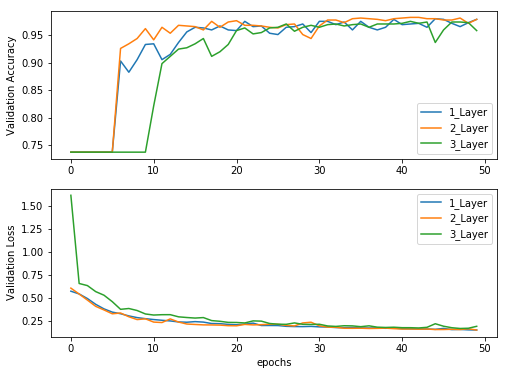

In [30]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (8, 6))

for history in history_dict:
    val_acc = history_dict[history].history['val_acc']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history)
    ax2.plot(val_loss, label=history)
    
ax1.set_ylabel('Validation Accuracy')
ax2.set_ylabel('Validation Loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

In [31]:
score = cnn_model_1.evaluate(x_test, y_test, verbose=1)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Acc  : {:.4f}'.format(score[1]))


624/624 [==============================] - 0s 220us/step
Test Loss : 0.8113
Test Acc  : 0.7436


In [52]:
score = cnn_model_1.evaluate(x_train, y_train, verbose=1)
print('Train Loss : {:.4f}'.format(score[0]))
print('Train Acc  : {:.4f}'.format(score[1]))

3337/3337 [==============================] - 1s 153us/step
Train Loss : 0.1501
Train Acc  : 0.9739


In [51]:
score = cnn_model_2.evaluate(x_test, y_test, verbose=1)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Acc  : {:.4f}'.format(score[1]))


624/624 [==============================] - 0s 388us/step
Test Loss : 0.7800
Test Acc  : 0.7788


In [53]:
score = cnn_model_2.evaluate(x_train, y_train, verbose=1)
print('Train Loss : {:.4f}'.format(score[0]))
print('Train Acc  : {:.4f}'.format(score[1]))

3337/3337 [==============================] - 1s 342us/step
Train Loss : 0.1420
Train Acc  : 0.9823


In [50]:
score = cnn_model_3.evaluate(x_test, y_test, verbose=1)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Acc  : {:.4f}'.format(score[1]))


624/624 [==============================] - 0s 602us/step
Test Loss : 0.5546
Test Acc  : 0.8429


In [54]:
score = cnn_model_3.evaluate(x_train, y_train, verbose=1)
print('Train Loss : {:.4f}'.format(score[0]))
print('Train Acc  : {:.4f}'.format(score[1]))

3337/3337 [==============================] - 2s 554us/step
Train Loss : 0.1828
Train Acc  : 0.9589


In [34]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
# This is used for plotting the images.
img_shape = (img_size, img_size)

# Tuple with height, width and depth used to reshape arrays.
# This is used for reshaping in Keras.
img_shape_full = (img_size, img_size, 1)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 2

labels = ['Normal\n', 'Pneumonia\n']


In [35]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 16
    
    # Create figure with 4x4 sub-plots.
    fig, axes = plt.subplots(4, 4)
    fig.subplots_adjust(hspace=1.0, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

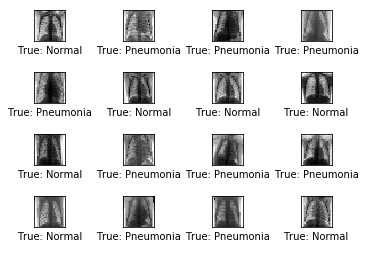

In [77]:
# Get the first images from the test-set.
random_data = np.random.randint(623, size= 16)
images = x_test[random_data]
cls_true = y_test[random_data]
cls_true = cls_true.astype(int)
cls_lbl = []
for i in range(len(cls_true)):
    cls_lbl = np.append(cls_lbl, labels[cls_true[i]])
    
# Get the true classes for those images.
cls_true = y_test[random_data]
# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_lbl)

In [78]:
print(random_data)

[570 422 100 210 488 460 262 331 554  85 146 198 542 584  96 576]


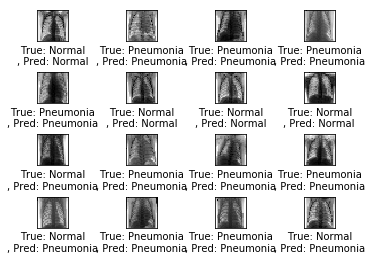

In [79]:
#Predict
#images = x_test[500:516]

images = x_test[random_data]

y_pred = cnn_model_1.predict(x=images) #swicth to model that we use 
cls_pred = np.argmax(y_pred,axis=1)
cls_lbl_pred = []
for i in range(len(y_pred)):
    cls_lbl_pred = np.append(cls_lbl_pred, labels[cls_pred[i]])
    

plot_images(images=images,
            cls_true=cls_lbl,
            cls_pred=cls_lbl_pred)

